# Full data experiments

In [ ]:
from prutils import *
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X, y = get_full_data(RAW_PIXELS_DATASET, split_validation=False)

"""
Results without processing
"""
lda = LDA().fit(X, y)
print "Performance without feature reduction: {}%".format(estimate_classifier_performance_normal(lda, RAW_PIXELS_TEST))

"""
Results with PCA
"""
pca = PCA(n_components=30)
lda = LDA()
lda.fit(pca.fit_transform(X), y)
print "Performance with PCA: {}%".format(estimate_classifier_performance_transform(lda, RAW_PIXELS_TEST, pca))

"""
Results with ICA
"""
ica = FastICA(n_components=30)
lda = LDA()
lda.fit(ica.fit_transform(X), y)
print "Performance with ICA: {}%".format(estimate_classifier_performance_transform(lda, RAW_PIXELS_TEST, ica))

# Batched data experiments

In [ ]:
from prutils import *
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


"""
Results without processing
"""
X, y = get_random_batch(RAW_PIXELS_DATASET, split_validation=False)
lda = LDA().fit(X, y)
print "Performance without feature reduction: {}%".format(estimate_classifier_performance_normal(lda, RAW_PIXELS_TEST))

"""
Results with PCA
"""
X, y = get_random_batch(RAW_PIXELS_DATASET, split_validation=False)
pca = PCA(n_components=20)
lda = LDA()
lda.fit(pca.fit_transform(X), y)
print "Performance with PCA: {}%".format(estimate_classifier_performance_transform(lda, RAW_PIXELS_TEST, pca))

"""
Results with PCA
"""
X, y = get_random_batch(RAW_PIXELS_DATASET, split_validation=False)
ica = FastICA(n_components=20)
lda = LDA()
lda.fit(ica.fit_transform(X), y)
print "Performance with ICA: {}%".format(estimate_classifier_performance_transform(lda, RAW_PIXELS_TEST, ica))

### PCA experiments

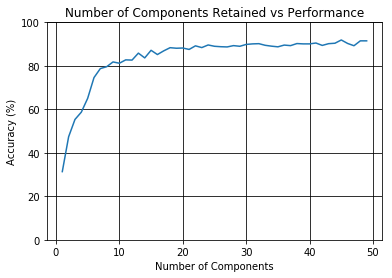

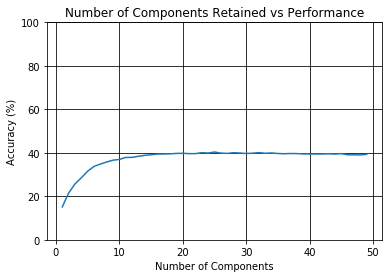

In [1]:
from prutils import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

pca_full_raw = run_PCA_experiment(LDA(), RAW_PIXELS_DATASET, max_components = 50, batch=False, show_results=True)
pca_batch_raw = run_PCA_experiment(LDA(), RAW_PIXELS_DATASET, max_components = 50, batch=True, show_results=True)

pca_full_features = run_PCA_experiment(LDA(), IM_FEATURES_DATASET, max_components = 50, batch=False, show_results=True)
pca_batch_features = run_PCA_experiment(LDA(), IM_FEATURES_DATASET, max_components = 50, batch=True, show_results=True)

plot_performance([pca_full_raw, pca_batch_raw, pca_full_features, pca_batch_features], show_results=False, save_to_file="testing_saves")

### ICA experiments

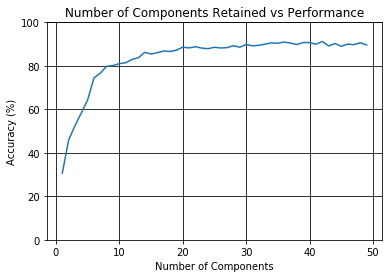

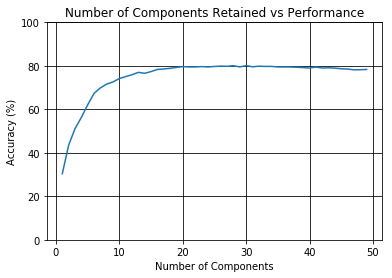

In [ ]:
from prutils import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

ica_full = run_ICA_experiment(LDA(), RAW_PIXELS_DATASET, max_components = 50, batch=False, show_results=True)
ica_batch = run_ICA_experiment(LDA(), RAW_PIXELS_DATASET, max_components = 50, batch=True, show_results=True)

### Kernel PCA experiments

In [ ]:
from prutils import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

kpca_full = run_KPCA_experiment(LDA(), RAW_PIXELS_DATASET, max_components = 50, batch=False, show_results=True)
kpca_batch = run_KPCA_experiment(LDA(), RAW_PIXELS_DATASET, max_components = 50, batch=True, show_results=True)